### Cleaning and preparing the data for model training


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# importing the dataset
df_train=pd.read_csv('blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# import the test data
df_test=pd.read_csv('blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
# merge both train and test data
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
# basic 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop(['User_ID'],axis=1,inplace=True)

In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
pd.get_dummies(df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


In [10]:
# handling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
# handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
pd.get_dummies(df['Age'])

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
783662,False,False,True,False,False,False,False
783663,False,False,True,False,False,False,False
783664,False,False,True,False,False,False,False
783665,False,False,False,False,True,False,False


In [13]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# second technqiue
# from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
# df['Age']= label_encoder.(df['Age'])
 
# df['Age'].unique()

In [15]:
# fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'])
df_city.head()

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


In [16]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,True,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,True,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,True,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,False,True


In [17]:
# drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,True,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,True,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,True,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,False,True


In [18]:
# Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [19]:
# focus on replacing missing values
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [21]:
df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [22]:
# replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [24]:
# product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [26]:
# replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,True,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,True,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,True,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,False,True


In [28]:
df.shape

(783667, 13)

In [29]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [31]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,True,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,True,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,True,False,False
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,False,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  bool   
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(3), fl

In [33]:
# convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  bool   
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(3), fl

In [34]:
df['A']=df['A'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int64  
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3),

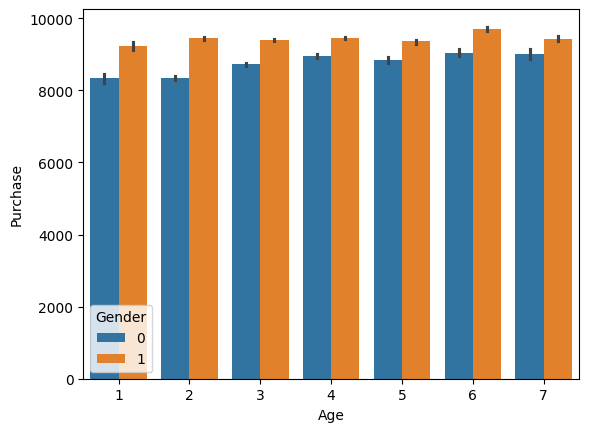

In [36]:
# Visualisation Age vs Purchased
sns.barplot(data=df,x='Age',y='Purchase',hue='Gender');

### Purchasing of men is high then women


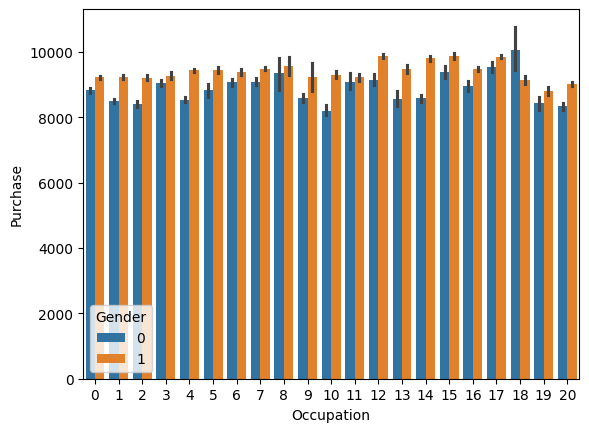

In [37]:
# Visualization of Purchase with occupation
sns.barplot(data=df,x='Occupation',y='Purchase',hue='Gender');

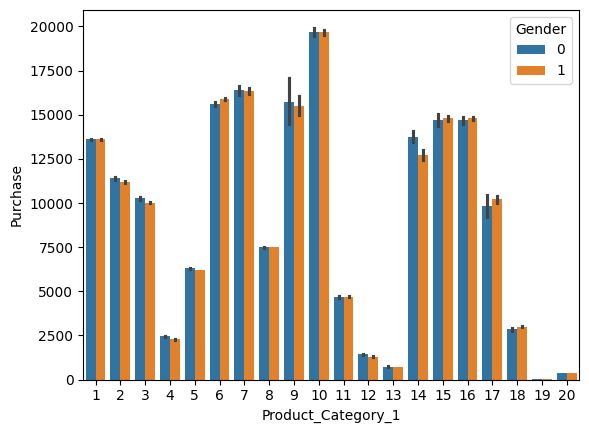

In [38]:
sns.barplot(data=df,x='Product_Category_1',y='Purchase',hue='Gender');

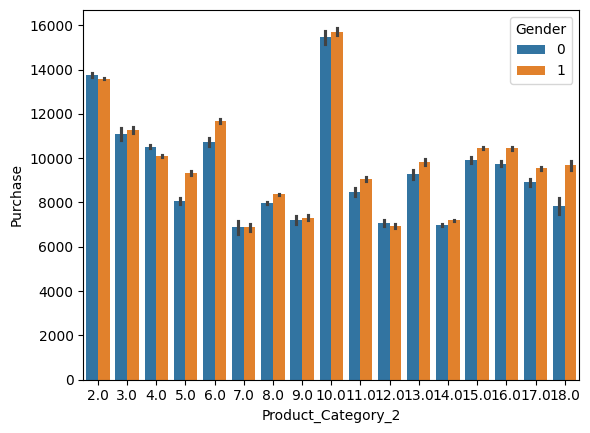

In [39]:
sns.barplot(data=df,x='Product_Category_2',y='Purchase',hue='Gender');

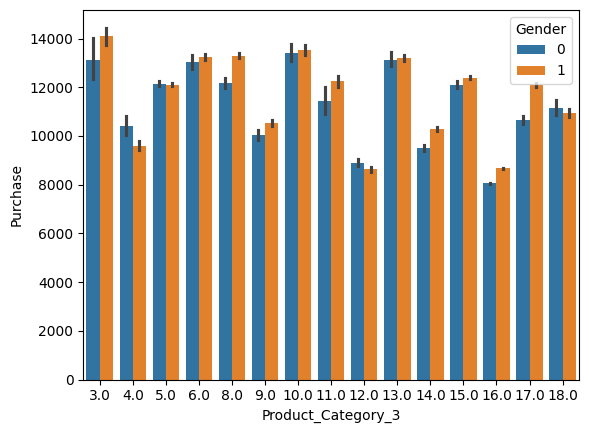

In [41]:
sns.barplot(data=df,x='Product_Category_3',y='Purchase',hue='Gender');


In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [44]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [46]:
# Feature Scaling 
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [47]:
X=df_train.drop('Purchase',axis=1)

In [48]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,0,1


In [49]:
X.shape

(550068, 12)

In [50]:
y=df_train['Purchase']

In [51]:
y.shape

(550068,)

In [52]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [54]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [55]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)